# Análise de Produto e Varejo

Fonte dos dados:

https://www.kaggle.com/datasets/carrie1/ecommerce-data?resource=download

https://www.kaggle.com/admond1994/e-commerce-data-eda/notebook

### Informações gerais sobre os dados
* Dataset disponibilizado no site Kaggle
* Empresa de varejo online com base no Reino Unido 
* O produto comercializado é principalmente composto de presentes / lembranças para todas as ocasiões
* O principal tipo de cliente são atacadistas (locais e internacionais)
* Período de transações analisado: 01/12/2010 a 09/12/2011 (aproximadamente 1 ano)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
plt.style.use('ggplot')

In [2]:
#para baixar e descompactar o arquivo .zip
from urllib.request import urlopen
from zipfile import ZipFile

df = pd.read_csv('./archive/data.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Alterando o formato de data - de String para Timestamp
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#Verificando se existem dados faltantes
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [8]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

É possível observar que, das 541909 linhas de dados, 135080 estão sem os valores de CustomerID (quase 25% do total!) e 1454 não possuem o campo Description.

In [9]:
#Criando um novo DataFrame sem os valores faltantes
df_sem_falt = df.dropna()

In [10]:
#Verificando os valores faltantes para cada coluna
df_sem_falt.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#Alterando o tipo da coluna CustumerID de String para Int (já que agora não temos NaN)
df_sem_falt['CustomerID'] = df_sem_falt['CustomerID'].astype('int64')
df_sem_falt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [12]:
df_sem_falt.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


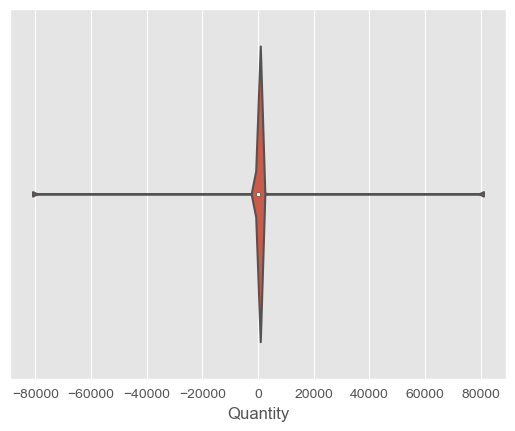

In [13]:
ax = sns.violinplot(x=df_sem_falt["Quantity"])

É possível observar que, por algum motivo, temos valores negativos no campo de Quantity (já que o valor de min está como -80995). Como neste caso não é possível um cliente comprar uma quantidade negativa de produtos, pode ser que este valor tenha sido provido de um erro de digitação, porém não é possível assegurar isso. Por isso, decidi por remover todas as linhas que constam uma quantidade negativa de vendas.

In [14]:
#removendo as linhas que possuem quantidades negativas
df_sem_falt = df_sem_falt[df_sem_falt.Quantity > 0]
df_sem_falt.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


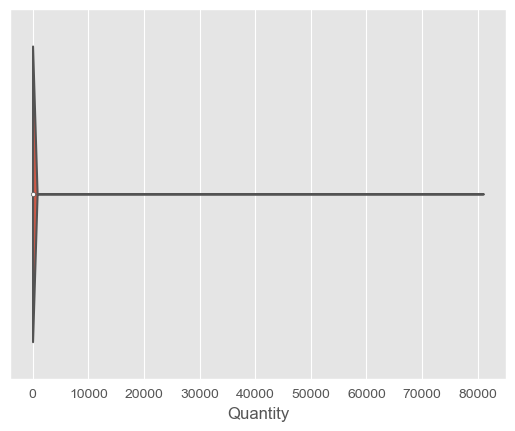

In [15]:
ax = sns.violinplot(x=df_sem_falt["Quantity"])

Um dado que falta neste dataset é o **valor da compra** dos produtos.
Porém, como possuímos a **quantidade** e o **preço unitário**, se multiplicarmos ambos, teremos o valor da compra

In [16]:
df_sem_falt['AmountSpent'] = df_sem_falt['Quantity'] * df_sem_falt['UnitPrice']
df_sem_falt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [17]:
#Adicionando tambem colunas especificas para o Mes, Dia e Hora que serao utilizadas futuramente na analise
df_sem_falt['year_month'] = df_sem_falt['InvoiceDate'].dt.to_period('M')

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df_sem_falt = df_sem_falt.join(pd.concat((getattr(df_sem_falt['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df_sem_falt.insert(loc=9,column='hour', value=df_sem_falt.InvoiceDate.dt.hour)
df_sem_falt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,hour,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,2010-12,2010,12,1,2,335,48,4


In [18]:
df_sem_falt.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

In [19]:
#devido ao fato da array de dias da semana comecar com 0, teremos que 0 = segunda, 1 = terca, 2 = quarta, etc...
#para evitar problemas de interpretacao, irei somar 1 a cada dia da semana
df_sem_falt['dayofweek'] = df_sem_falt['dayofweek'] + 1
df_sem_falt.dayofweek.unique()

array([3, 4, 5, 7, 1, 2])

In [20]:
df_sem_falt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   hour         397924 non-null  int64         
 10  year_month   397924 non-null  period[M]     
 11  year         397924 non-null  int64         
 12  month        397924 non-null  int64         
 13  day          397924 non-null  int64         
 14  dayofweek    397924 non-null  int64         
 15  dayofyear    397924 non-null  int6

## Analise exploratória

In [21]:
#Para facilitar escrever o código, primeiro irei trocar o nome do DataFrame por um mais curto
df2 = df_sem_falt.copy()

### Verificando o número de pedidos por cliente por cada país

In [22]:
pedidos_por_cliente = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values(
    by='InvoiceNo', ascending=False)
pedidos_por_cliente.columns = ['CustomerID', 'Country', 'NumberOfSales']
pedidos_por_cliente.head()

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


### Visualizando o número de vendas para todos os clientes

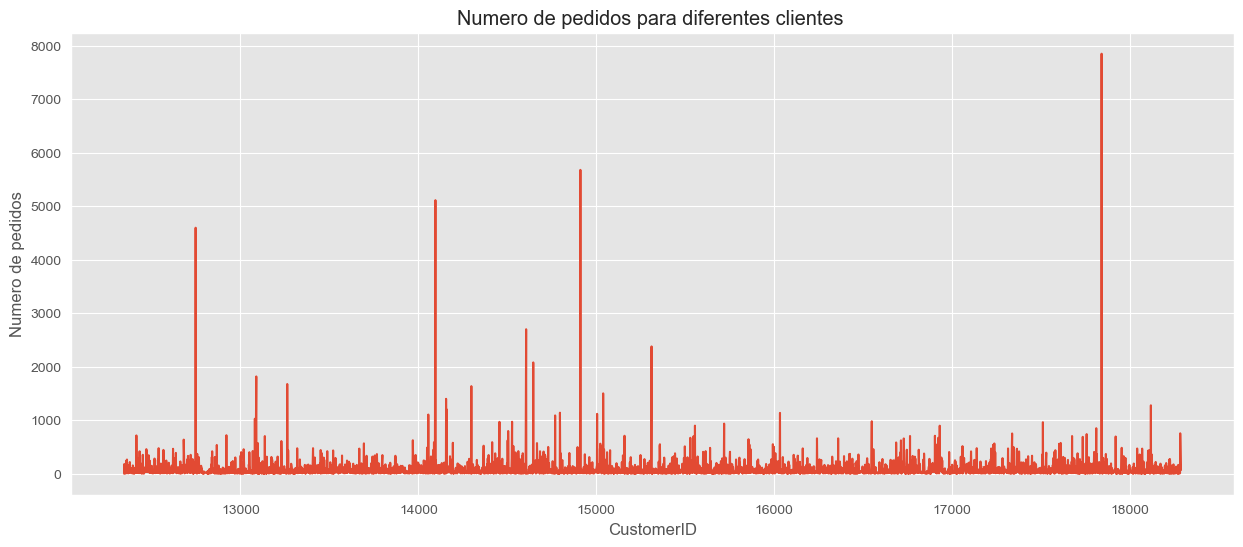

In [23]:
pedidos = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(pedidos.CustomerID, pedidos.InvoiceNo)
plt.xlabel('CustomerID')
plt.ylabel('Numero de pedidos')
plt.title('Numero de pedidos para diferentes clientes ')
plt.show()

Com este gráfico, percebe-se que a maioria dos clientes fez menos que 1000 pedidos durante o ano, porém existem 4 clientes que fizeram mais que 4000 pedidos durante o ano, e o que mais fez pedidos fez quase 8000 pedidos!

### Verificando o gasto total por cliente

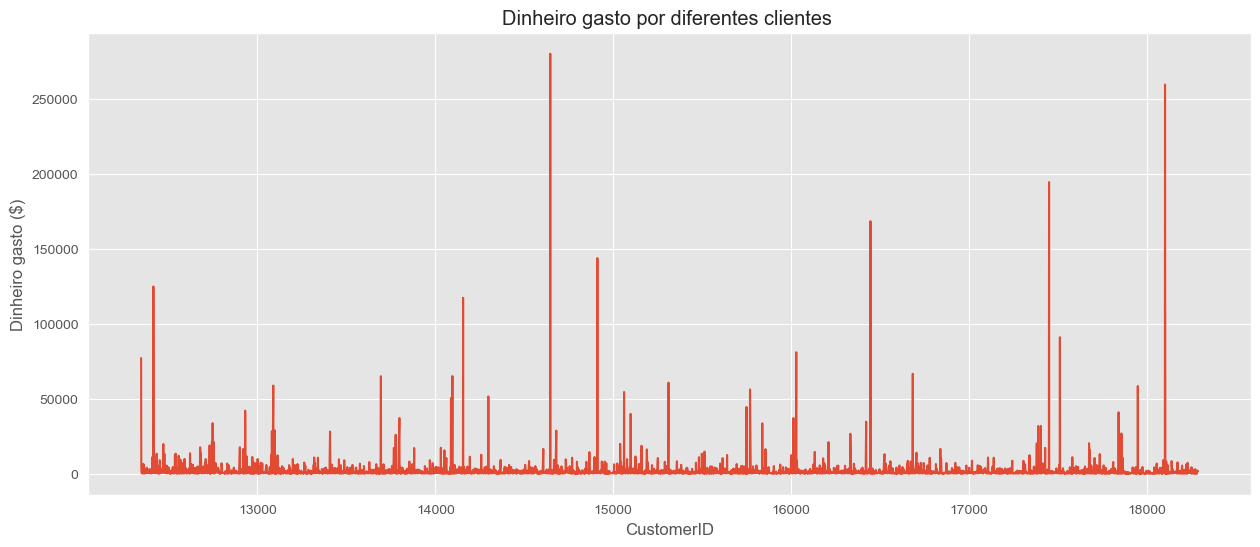

In [24]:
dinheiro_gasto = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(dinheiro_gasto.CustomerID, dinheiro_gasto.AmountSpent)
plt.xlabel('CustomerID')
plt.ylabel('Dinheiro gasto ($)')
plt.title('Dinheiro gasto por diferentes clientes ')
plt.show()

Plotando o gráfico do dinheiro gasta por cliente, é interessante notar que o cliente que mais fez pedidos não foi necessariamente o que mais gastou! Além disso, novamente verificamos que a maioria dos clientes gastam menos que *50.000 dólares* anualmente nesta loja, enquanto que o cliente que mais gastou chegou a pagar mais que *250.000 dólares* em compras durante todo o ano. Ou seja, o cliente que mais fez pedidos realizou diversas compras de valores pequenos!

In [25]:
#Para verificar os ID's dos clientes que mais gastaram juntamente com os valores:
dinheiro_gasto = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
dinheiro_gasto.columns = ['CustomerID', 'Country', 'TotalSpent']
dinheiro_gasto.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


# Padrões de compra (Purchasing Patterns)

https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

## Número de pedidos por mês

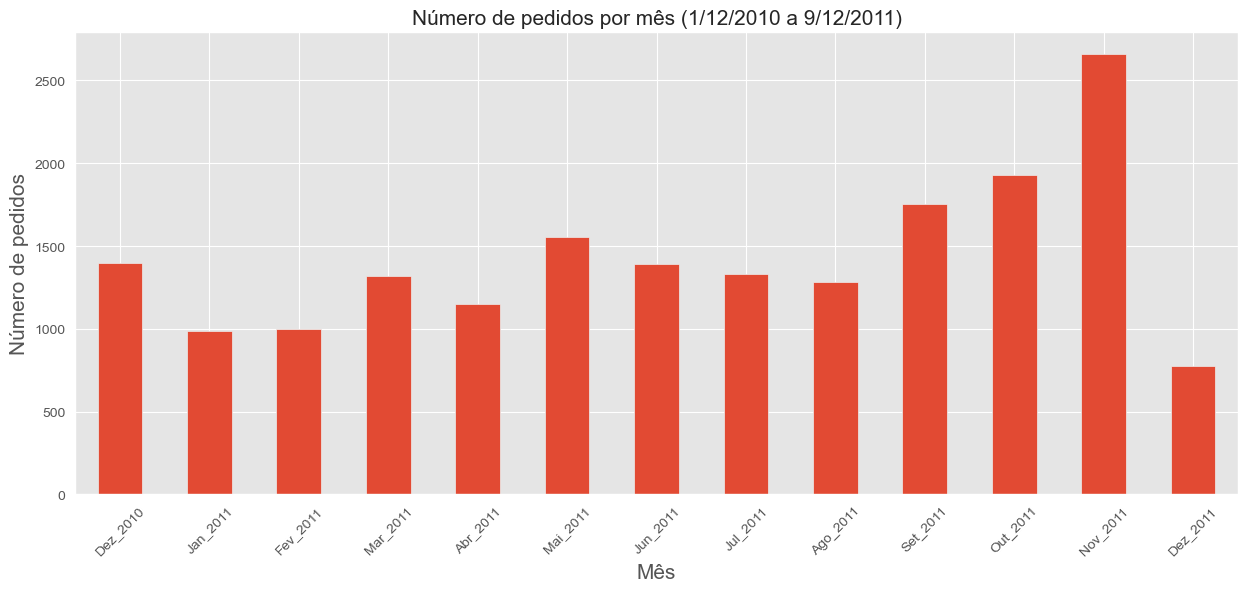

In [35]:
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15,6))
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Número de pedidos', fontsize=15)
ax.set_title('Número de pedidos por mês (1/12/2010 a 9/12/2011)', fontsize=15)
ax.set_xticklabels(('Dez_2010', 'Jan_2011', 'Fev_2011', 'Mar_2011', 'Abr_2011', 'Mai_2011', 'Jun_2011', 'Jul_2011'
                   , 'Ago_2011', 'Set_2011', 'Out_2011', 'Nov_2011', 'Dez_2011'), rotation=45)
plt.show()

É interessante se observar que existe um crescimento substancial de vendas deste empreendimento nos últimos meses do ano próximos à Black Friday e ao Natal - o que faz sentido, uma vez que se trata de uma loja de presentes! Aqui notamos que o pico de vender em 2011 foi em Novembro, porém os dados de Dezembro/2011 não constam as vendas do mês inteiro uma vez que só temos os dados de vendas até 9 de Dezembro 2011.

## Dia da semana que são feitos maior quantidade de pedidos

In [32]:
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

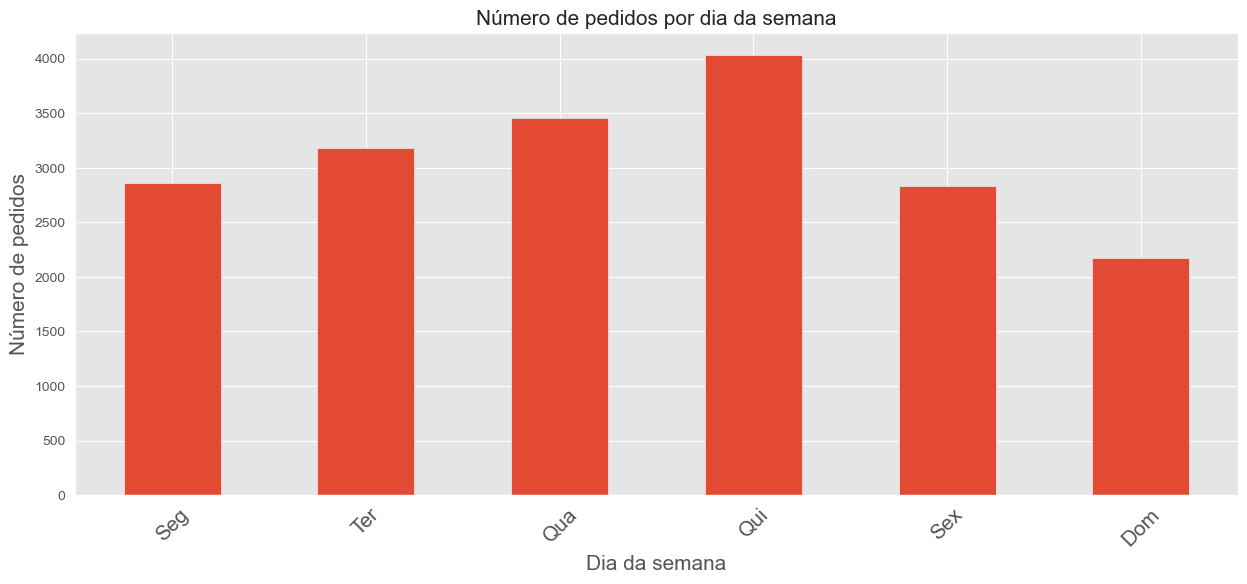

In [37]:
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15,6))
ax.set_xlabel('Dia da semana', fontsize=15)
ax.set_ylabel('Número de pedidos', fontsize=15)
ax.set_title('Número de pedidos por dia da semana', fontsize=15)
ax.set_xticklabels(('Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Dom'), rotation=45, fontsize=15)
plt.show()

O dia da semana que mais são feitos pedidos é na Quinta-Feira e o dia que menos vendas são feitas é no Domingo. Essa informação pode ser utilizada pelo setor de Marketing para realizar ações de promoção às quintas (para elevar ainda mais as vendas nesse dia) ou focar nos dias em que são feitos menos pedidos!

## Horários que são feitos maior quantidade de pedidos

In [ ]:
#ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar', figsize=(15,6))
ax = df2.groupby('InvoiceNo')['hour'].unique()
df2.value_counts().iloc[0:-1].sort_index().plot(kind='bar', figsize=(15,6))
ax.set_xlabel('Horário', fontsize=15)
ax.set_ylabel('Número de pedidos', fontsize=15)
ax.set_title('Número de pedidos por hora', fontsize=15)
ax.set_xticklabels(range(6,21), rotation=45, fontsize=15)
plt.show()

## Analizando os preços unitários dos produtos

In [60]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

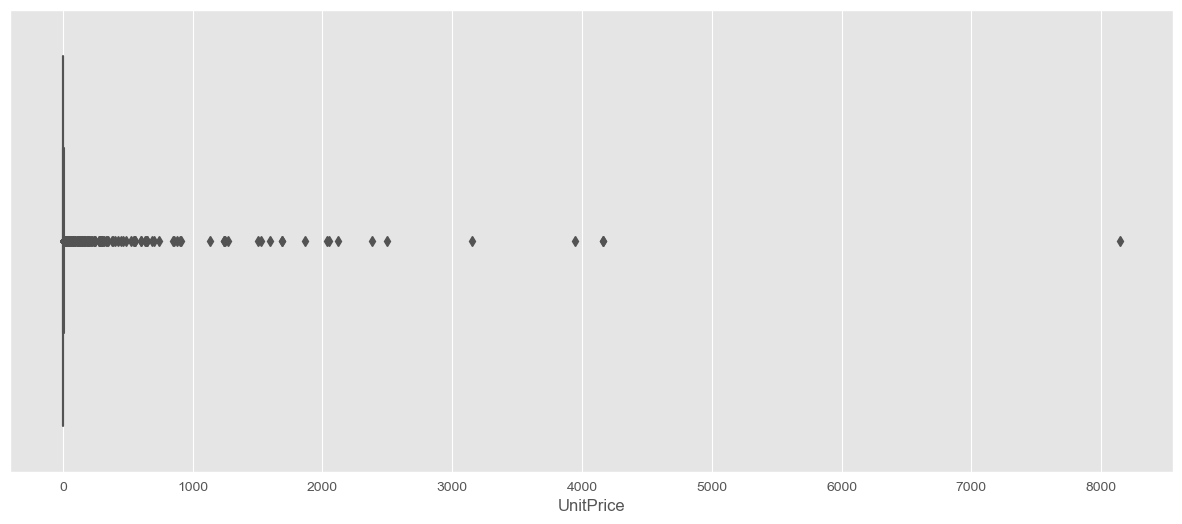

In [61]:
plt.subplots(figsize=(15,6))
sns.boxplot(df2.UnitPrice)
plt.show()

Estranhamente, pode-se perceber que existem itens com valor de 0.00 dólares! E existe também um outlier se tratando de um produto de 8142.75 dólares enquanto a média é de 3.12 dólares. Vamos identificar quais são estes produtos a seguir

In [62]:
df_de_graça = df2[df2.UnitPrice == 0]
print(len(df_de_graça))
df_de_graça.head(10)

40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,hour,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,14,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,14,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,13,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,16,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,16,2011-01,2011,1,6,4,6,1,1
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0,15,2011-01,2011,1,13,4,13,2,1
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0,13,2011-02,2011,2,10,4,41,6,1
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0,10,2011-03,2011,3,23,3,82,12,1
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0,12,2011-03,2011,3,30,3,89,13,1
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0,14,2011-04,2011,4,4,1,94,14,2


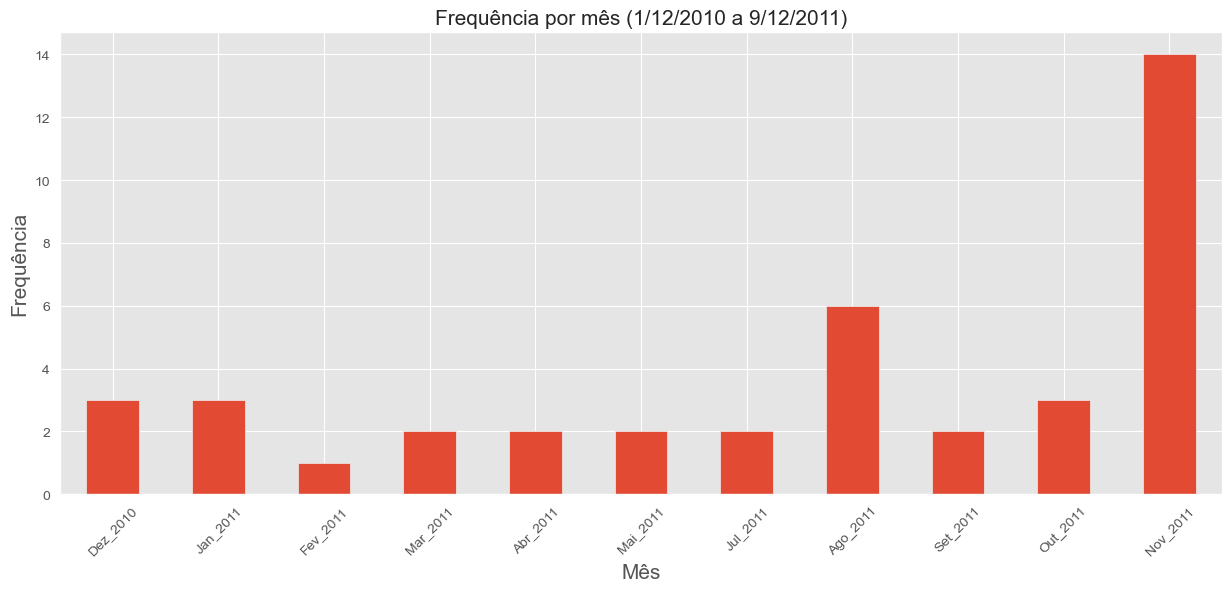

In [69]:
#verificando quando estes 40 itens de graça foram distribuidos (se foi alguma promoção de um dia ou mês, etc.)
ax = df_de_graça.year_month.value_counts().sort_index().plot(kind='bar', figsize=(15,6))
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)
ax.set_title('Frequência por mês (1/12/2010 a 9/12/2011)', fontsize=15)
ax.set_xticklabels(('Dez_2010', 'Jan_2011', 'Fev_2011', 'Mar_2011', 'Abr_2011', 'Mai_2011', 'Jul_2011'
    , 'Ago_2011', 'Set_2011', 'Out_2011', 'Nov_2011'), rotation=45)
plt.show()

Em média, esta loja sorteia de 2 a 4 itens gratuitos para seus clientes a cada mês!

Agora vamos identificar quais os itens mais caros:

In [64]:
df_caros = df2[df2.UnitPrice > 3000]
print(len(df_caros))
df_caros.head()

5


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,hour,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,13,2011-05,2011,5,3,2,123,18,2
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502,United Kingdom,3155.95,16,2011-10,2011,10,3,1,276,40,4
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore,3949.32,11,2011-10,2011,10,19,3,292,42,4
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France,4161.06,14,2011-10,2011,10,27,4,300,43,4
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France,4161.06,14,2011-10,2011,10,27,4,300,43,4


Interessante notar que o "produto" mais caro é uma postagem, enquanto que os demais são manuais. Não se sabe se trata-se de algum erro de digitação dos preços unitários ou se de fato o item manual custa 4000 dólares. Para maiores informações, uma discussão com a equipe de produto deve ser tomada para juntos realizar a decisão se estes valores de fato devem ser considerados na análise deve ser feita.

# Análise por país

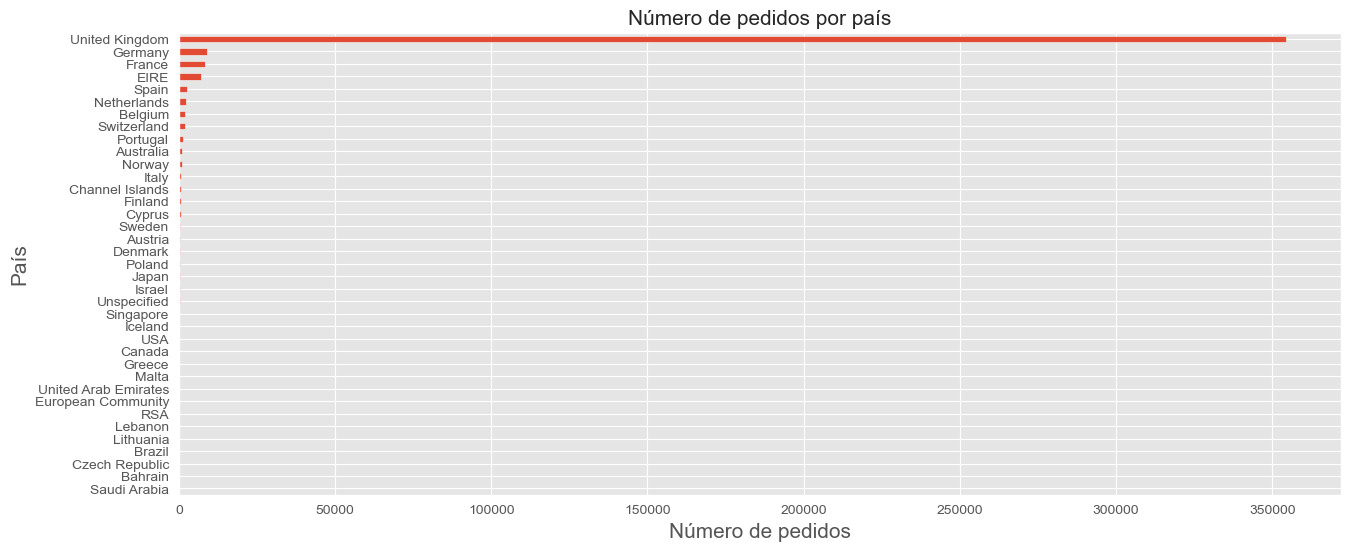

In [77]:
pedidos_por_pais = df2.groupby('Country')['InvoiceDate'].count().sort_values()

plt.subplots(figsize=(15,6))
pedidos_por_pais.plot(kind='barh', fontsize=10)
plt.xlabel('Número de pedidos', fontsize=15)
plt.ylabel('País', fontsize=15)
plt.title('Número de pedidos por país', fontsize=15)
plt.show()

É possível perceber que o Reino Unido (UK) foi o país que de longe mais fez pedidos na loja durante o ano. Porém, devido à essa disparidade, não é possível extrair muita informação dos demais países. Devido a isso, irei retirar o Reino Unido do próximo gráfico.

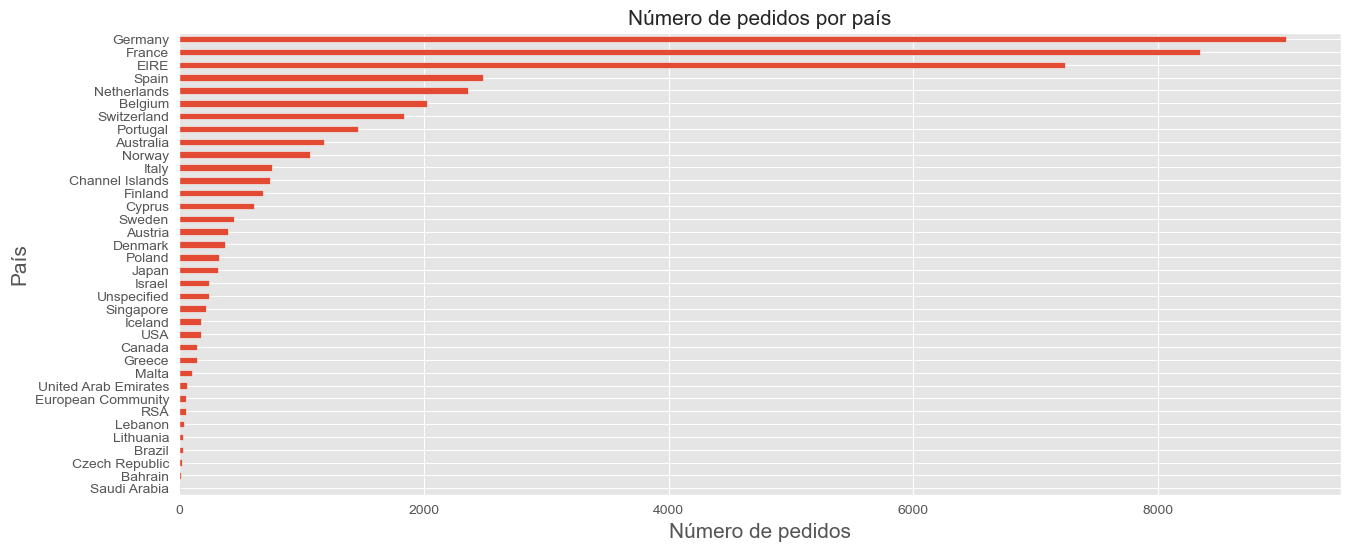

In [78]:
pedidos_por_pais_sem_UK = pedidos_por_pais.copy()
del pedidos_por_pais_sem_UK['United Kingdom']

plt.subplots(figsize=(15,6))
pedidos_por_pais_sem_UK.plot(kind='barh', fontsize=10)
plt.xlabel('Número de pedidos', fontsize=15)
plt.ylabel('País', fontsize=15)
plt.title('Número de pedidos por país', fontsize=15)
plt.show()

Agora sim é possível observar que a maioria das vendas fora do Reino Unido são feitas para países europeus. Além disso é interessante notar que não há registros de vendas para a China - o que é intrigante devido ao tamanho do mercado chinês... talvez a própria China quem fornece os produtos à loja. 

Já o Brasil é o único país da América do Sul que aparece na lista de compradores, e mesmo assim em uma posição muito baixa. Possivelmente o preço do frete + impostos inviabilize importações maiores para o país.

Agora verificaremos a quantidade de dinheiro gasta por cada país. Como já foi visto anteriormente ao analizarmos os clientes que mais fazem pedidos, foi verificado que não necessariamente o cliente que mais fez compras foi o que mais gastou na loja! Vamos verificar se o mesmo ocorre em nível de país.

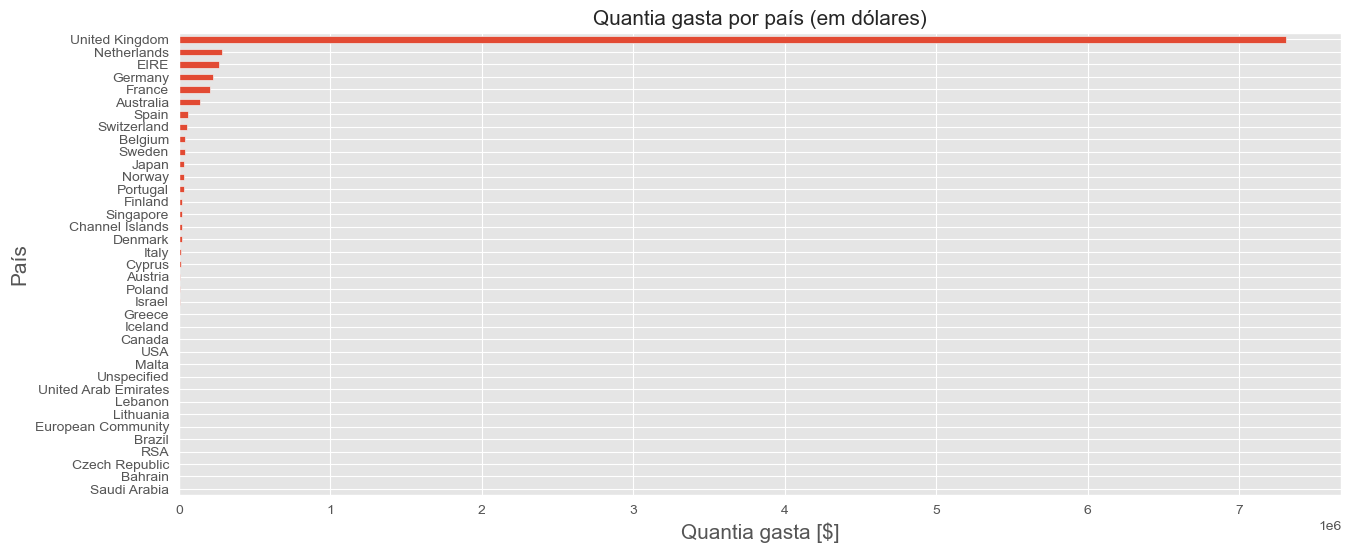

In [79]:
gastos_por_pais = df2.groupby('Country')['AmountSpent'].sum().sort_values()
plt.subplots(figsize=(15,6))
gastos_por_pais.plot(kind='barh', fontsize=10)
plt.xlabel('Quantia gasta [$]', fontsize=15)
plt.ylabel('País', fontsize=15)
plt.title('Quantia gasta por país (em dólares)', fontsize=15)
plt.show()

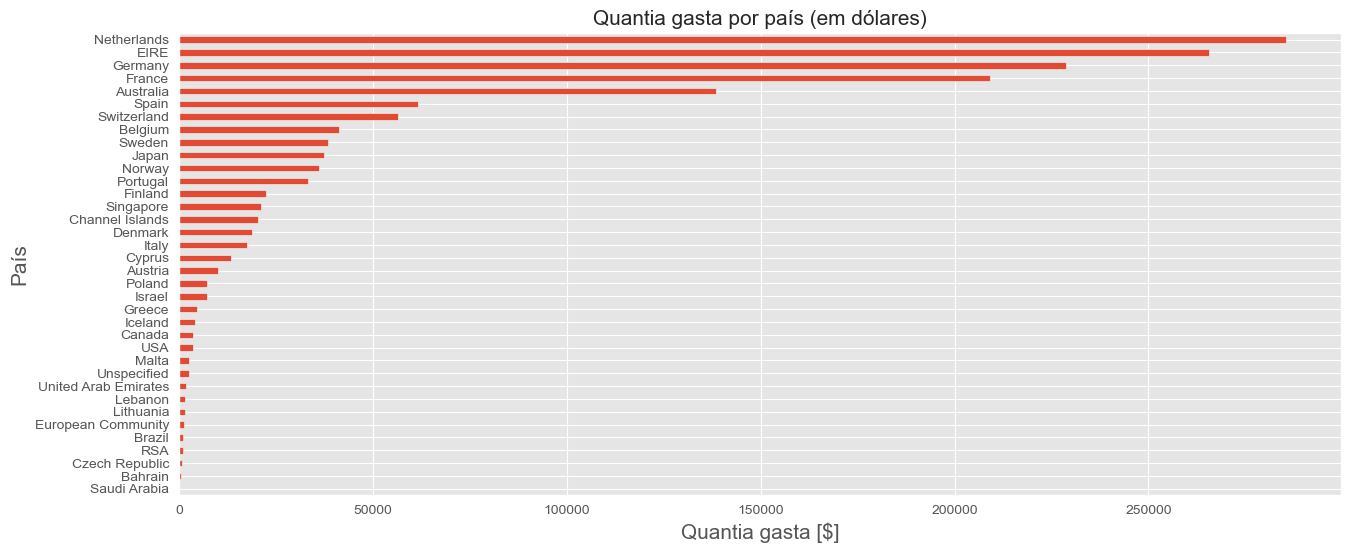

In [80]:
#excluindo o Reino Unido
gastos_por_pais = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del gastos_por_pais['United Kingdom']

plt.subplots(figsize=(15,6))
gastos_por_pais.plot(kind='barh', fontsize=10)
plt.xlabel('Quantia gasta [$]', fontsize=15)
plt.ylabel('País', fontsize=15)
plt.title('Quantia gasta por país (em dólares)', fontsize=15)
plt.show()

Apesar da Alemanha ser segundo país que mais fez pedidos, o país que efetivamente mais gastou na loja foi a Holanda seguido da Irlanda (EIRE)! Além disso, sem contar com o UK, pode-se observar que os 5 primeiros países gastam quase 80% do faturamento total.

# Avaliando a fidelização de clientes

In [92]:
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))
#Para pegarmos os dados dos dias completos
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-11-30 17:37:00


In [93]:
#pegando a quantidade gasta por invoice, relacionando com o País e com o Customer ID
invoice_cliente_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg(
    {'AmountSpent':sum, 'CustomerID': max, 'Country': max,}).sort_values(
    by='AmountSpent', ascending=False).reset_index()
invoice_cliente_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
1,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
2,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
3,556917,2011-06-15 13:37:00,22775.93,12415,Australia
4,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom


In [94]:
# Calculando a quantidade de clientes que fizeram mais de um pedido por mes
clientes_repetidos_mes_df = invoice_cliente_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

clientes_repetidos_mes_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [96]:
#numero de clientes unicos por mes
clientes_unicos_mes_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
clientes_unicos_mes_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [100]:
#relação de clientes repetidos para clientes únicos por mês
porcentagem_clientes_repetidos_mes = clientes_repetidos_mes_df/clientes_unicos_mes_df*100
porcentagem_clientes_repetidos_mes

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

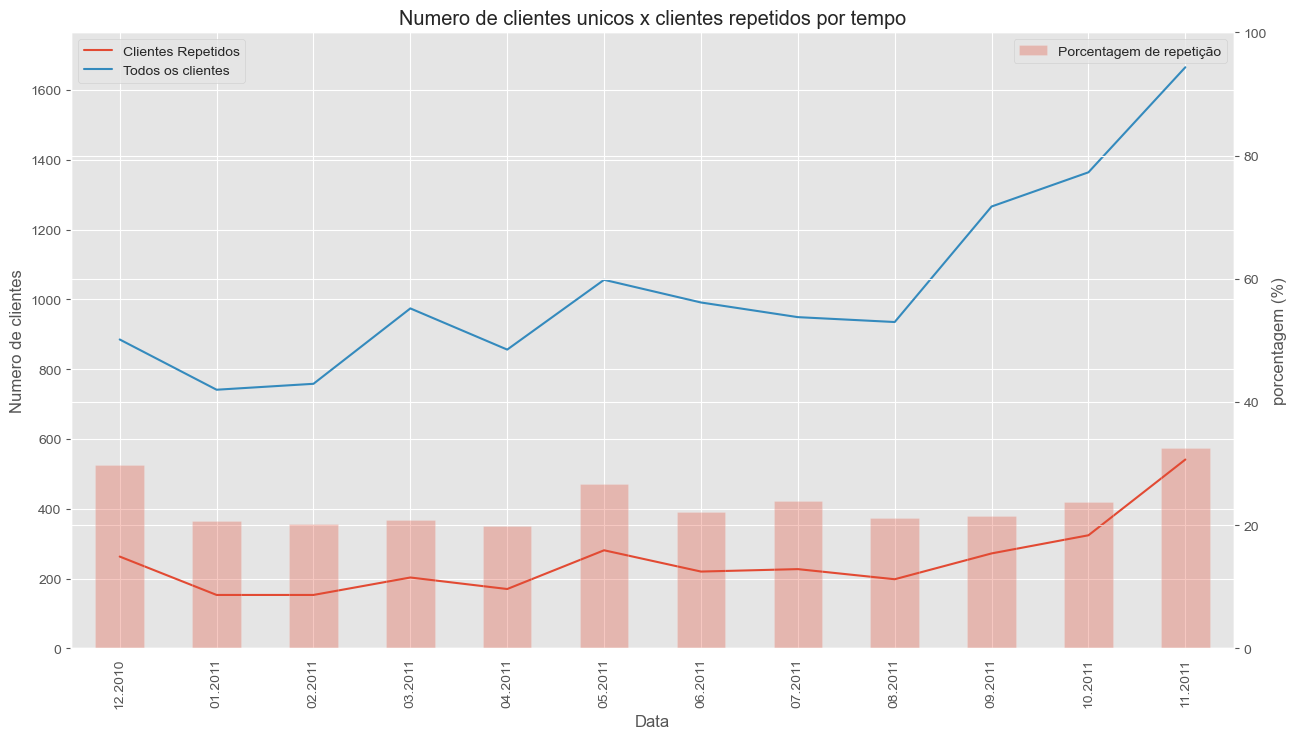

In [101]:
# Plotando um gráfico para melhor visualização da relação

ax = pd.DataFrame(clientes_repetidos_mes_df.values).plot(figsize=(15,8))
pd.DataFrame(clientes_unicos_mes_df.values).plot(ax=ax, grid=True)

ax2 = pd.DataFrame(porcentagem_clientes_repetidos_mes.values).plot.bar(ax=ax, grid=True, secondary_y=True, alpha=0.3)

ax.set_xlabel('Data')
ax.set_ylabel('Numero de clientes')
ax.set_title('Numero de clientes unicos x clientes repetidos por tempo')

ax2.set_ylabel('porcentagem (%)')

ax.legend(['Clientes Repetidos', 'Todos os clientes'])
ax2.legend(['Porcentagem de repetição'], loc='upper right')

ax.set_ylim([0, clientes_unicos_mes_df.values.max()+100])
ax2.set_ylim([0,100])

plt.xticks(range(len(clientes_repetidos_mes_df.index)), [x.strftime('%m.%Y') for x in clientes_repetidos_mes_df.index], rotation=45)
plt.show()

Por este gráfico, é possível concluir que, durante o ano, a porcentagem de repetição de clientes (o que indica a fidelização dos mesmos) se mantem em média nos 25%, porém, comparando os números de clientes repetidos com todos os clientes, percebe-se uma ascensão na curva, o que indica um crescimento! Seria interessante a realização de uma pesquisa tanto com os clientes que retornaram quanto com os que não retornam para assim traçar um plano para aumento e retenção da fidelização de clientes no mercado.

# Análise das vendas de produtos

In [107]:
#separando a quantidade de cada item vendida por mês
data_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
data_item_df.sort_values(ascending=False).head(10)

InvoiceDate  StockCode
2011-01-31   23166        74215
2011-11-30   84826        12551
             23084        12393
2011-04-30   84077        10224
2011-11-30   22197         8458
2011-10-31   84077         8174
2011-05-31   22197         6738
2011-08-31   84879         6425
2011-10-31   23084         6249
2011-11-30   22086         5919
Name: Quantity, dtype: int64

In [108]:
#Verificando agora os top10 items mais vendidos por mês
data_item_df = df.loc[df['StockCode'].isin(['23166','84826','23084','84077','22197','84077','22197','84879','23084','22086'])].set_index(
    'InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

data_item_df

InvoiceDate  StockCode
2010-12-31   22086        2453
             22197        2731
             84077        5195
             84826         306
             84879        2371
                          ... 
2011-12-31   23084        4298
             23166         207
             84077        1367
             84826          92
             84879        1330
Name: Quantity, Length: 80, dtype: int64

In [109]:
#fazendo agora a tendencia dos itens mais vendidos por mes
trending_items_df = data_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)
trending_items_df

StockCode,22086,22197,23084,23166,84077,84826,84879
InvoiceDate,,,,,,,
2010-12-31,2453.0,2731.0,0.0,0.0,5195.0,306.0,2371.0
2011-01-31,24.0,1809.0,0.0,0.0,1492.0,480.0,1771.0
2011-02-28,5.0,2663.0,0.0,0.0,3518.0,66.0,1667.0
2011-03-31,87.0,2798.0,0.0,0.0,3888.0,60.0,2649.0
2011-04-30,-27.0,1856.0,0.0,0.0,10143.0,1.0,2560.0
2011-05-31,17.0,6848.0,1131.0,792.0,3893.0,0.0,2899.0
2011-06-30,344.0,2092.0,1693.0,157.0,2122.0,4.0,1540.0
2011-07-31,377.0,1862.0,318.0,730.0,3714.0,2.0,1844.0
2011-08-31,370.0,5416.0,1783.0,414.0,2261.0,72.0,6552.0


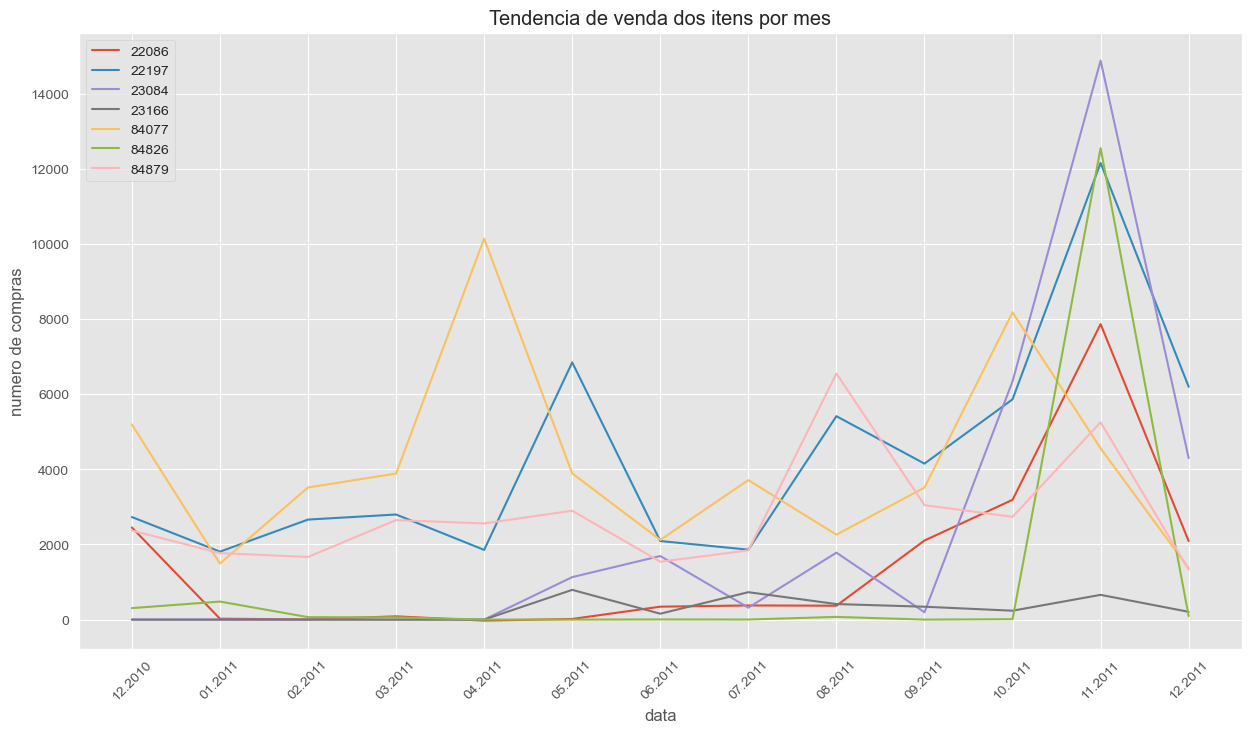

In [111]:
ax = pd.DataFrame(trending_items_df.values).plot(figsize=(15,8), grid=True)

ax.set_ylabel('numero de compras')
ax.set_xlabel('data')
ax.set_title('Tendencia de venda dos itens por mes')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(range(len(trending_items_df.index)), [x.strftime('%m.%Y') for x in trending_items_df.index], rotation=45)

plt.show()